# This notebook is for checking the alert criteria

## Part 1. Read Into DataFrame 
Here are two ways
1. If you have the data as the csv, you can use the first methods to read data directly. Note: This notebook should be in the same folder with the csv file, otherwise, you need to change the driectory.
2. If you wanna link it with the Database, and use the data from DB, then use the second one.

(Also, u can use the second method to get the table, and caculate and clean the data by using the code at step 2)

### First Method

In [190]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib.pylab import plt 

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

In [147]:
value=pd.read_csv('Change Values 2020.csv') ## 👍🏻 note: If the notebook u created is in the different directory of ur csv, u can change it into Read_csv('desktop:/ change_rate.csv')

In [148]:
value.head()## read the first 5 rows of the table

,opportunityid,change_date,field,oldvalue,newvalue
0,0063800000kpMwVAAU,2018-04-08T20:31:05.0000000,Amount,0.0,4860.0
1,0063800000mONmWAAW,2018-07-02T14:52:44.0000000,Amount,NaN,0.0
2,0063800000kplgmAAA,2018-04-12T16:42:39.0000000,Amount,NaN,0.0
3,0063800000kpTKgAAM,2018-04-12T12:25:41.0000000,Amount,600.0,400.0
4,0063800000kqTVOAA2,2018-04-23T15:44:53.0000000,Amount,166654.0,83327.0


### Second Method

for windows, first time user, u need to download this package by using 'pip install psycopg2'

In [ ]:
# pip install psycopg2

In [191]:
# import psycopg2
# con=psycopg2.connect(dbname= 'race', host='race-dw.db.amazon.com', 
# port= '8192', user= 'xndi', password= 'Xd8784652@')

In [192]:
# cur = con.cursor()

In [193]:
# cur.execute("SELECT * FROM restrict_ext.opportunityfieldhistory where opportunityid='0065000000YfY2IAAV';")

In [ ]:
# for row in cur.fetchall():
#     print(row[:2])

In [ ]:
# pip install SQLAlchemy

In [ ]:
# import pandas as pd
# import numpy as np 
# import seaborn as sns
# from matplotlib.pylab import plt

In [ ]:
# import warnings
# warnings.filterwarnings(action='ignore')

In [195]:
# from sqlalchemy import create_engine
# import pandas as padas
# engine = create_engine('postgresql://xndi:Xd8784652@@race-dw.db.amazon.com:8192/race')## 👍🏻you need to change the DB name, Db connection, port
# value_sql= padas.read_sql_query(''' 
# select opportunityid, oldvalue, newvalue, round(convert(float,change_rate),1) as change_rate,createddate
#   from
# ( select opportunityid, oldvalue, newvalue,
#   case when oldvalue <> 0 then round((newvalue-oldvalue)/oldvalue,2)
#   else '999999' end as Change_rate,createddate
#   from
# (select opportunityid, round(convert(float, isnull(oldvalue, '0')),1) as oldvalue,round(convert(float, isnull(newvalue, '0')),1) as newvalue,createddate
# from restrict_ext.opportunityfieldhistory
# where field='Amount' and oldvalue!=0 and newvalue!=0 ))temp1''', engine)

In [196]:
# value_sql.head()

,opportunityid,oldvalue,newvalue,change_rate,createddate
0,0063800000dQcD6AAK,50000.0,100000.0,1.0,2016-10-21 20:25:54
1,0065000000MkJ3PAAV,200.0,700.0,2.5,2014-07-19 00:22:24
2,0063800000cvBmxAAE,240000.0,311000.0,0.3,2016-10-20 07:37:29
3,0063800000dQ0pNAAS,15024.0,19048.0,0.3,2016-11-08 15:07:08
4,0063800000cTh1cAAC,5000.0,12000.0,1.4,2016-12-05 17:01:43


## Part 2. Look at all the Data -Overview 

In [149]:
value.shape ## Check how many data in total , (row, columns) 

(59361, 5)

In [151]:
# if you are using SQL to operate, then you don't need this step 👍🏻
value=value[['opportunityid','oldvalue','newvalue']].fillna(-1)# Fill Nan Value with -1 and delete te null values

value=value[(value['oldvalue'] != -1)&(value['newvalue'] != -1)]
value=value[(value['oldvalue']!=0.0)&(value['newvalue']!=0.0)]

In [152]:
value ## look at how the table looks like 

,opportunityid,oldvalue,newvalue
3,0063800000kpTKgAAM,600.0,400.0
4,0063800000kqTVOAA2,166654.0,83327.0
5,0063800000oWSYwAAO,125.0,1050.0
15,0063800000mNSg9AAG,100.0,1000.0
24,0060z00001wmZQwAAM,700.0,2000.0
...,...,...,...
59331,0060z000022AubfAAC,20000.0,15000.0
59340,0060z000022v6ZSAAY,10000.0,20000.0
59343,0060z0000228YCRAA2,11000.0,5000.0
59346,0060z000022thFWAAY,1500.0,7500.0


In [153]:
value['change_rate']=(value['newvalue']-value['oldvalue'])/value['oldvalue']# caculate the change_rate

In [154]:
value

,opportunityid,oldvalue,newvalue,change_rate
3,0063800000kpTKgAAM,600.0,400.0,-0.333333
4,0063800000kqTVOAA2,166654.0,83327.0,-0.500000
5,0063800000oWSYwAAO,125.0,1050.0,7.400000
15,0063800000mNSg9AAG,100.0,1000.0,9.000000
24,0060z00001wmZQwAAM,700.0,2000.0,1.857143
...,...,...,...,...
59331,0060z000022AubfAAC,20000.0,15000.0,-0.250000
59340,0060z000022v6ZSAAY,10000.0,20000.0,1.000000
59343,0060z0000228YCRAA2,11000.0,5000.0,-0.545455
59346,0060z000022thFWAAY,1500.0,7500.0,4.000000


Start with this part if you are using SQL 

In [155]:
value1=value.sort_values(by='change_rate') ## sort by the change_rate
value1.head()

,opportunityid,oldvalue,newvalue,change_rate
4178,0060z00001xrZS0AAM,374304.0,3.74,-0.999990
10865,0060z000023T8s4AAC,53500.0,1.00,-0.999981
27384,0060z00001z0go3AAA,15000.0,1.00,-0.999933
50140,0060z00001wnLA7AAM,7129.0,1.00,-0.999860
20505,0063800000kqxbxAAA,6500.0,1.00,-0.999846


In [156]:
change_rate=value.groupby(['change_rate'])['change_rate'].agg('count').to_frame().rename(columns={'change_rate':'count'})
change_rate=change_rate.reset_index()

In [157]:
change_rate  ## the count for each change Rate

,change_rate,count
0,-0.999990,1
1,-0.999981,1
2,-0.999933,1
3,-0.999860,1
4,-0.999846,1
...,...,...
3996,3999.000000,1
3997,9999.000000,1
3998,10799.000000,1
3999,29999.000000,1


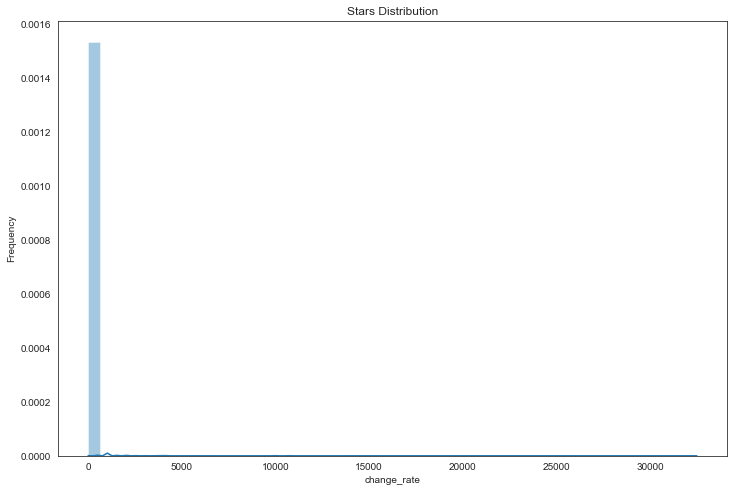

In [41]:
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.distplot(value1['change_rate'])
plt.xlabel('change_rate')
plt.ylabel('Frequency')
plt.title('Stars Distribution')
plt.show()  ## Draw the distribution 

## Part 3. Divided into >0 and <0 

## Negative Data

In [59]:
negative=value1.loc[value1['change_rate']<0]
negative.shape

(4505, 3)

In [60]:
negative.describe() ## to look at the stats description of the nagative change rate 

,oldvalue,newvalue,change_rate
count,4.505000e+03,4.505000e+03,4.505000e+03
mean,7.578970e+04,3.958787e+04,-4.678953e-01
std,8.731711e+05,5.373420e+05,2.686795e-01
min,3.000000e-02,2.000000e-02,-9.999900e-01
25%,1.000000e+03,4.000000e+02,-6.666667e-01
50%,4.000000e+03,1.620000e+03,-5.000000e-01
75%,1.551905e+04,7.400000e+03,-2.500000e-01
max,3.200000e+07,2.020000e+07,-2.360044e-07


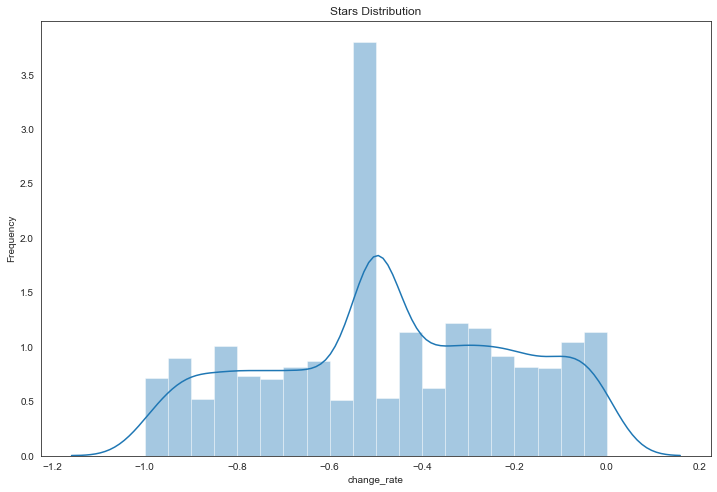

In [61]:
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.distplot(negative['change_rate'])
plt.xlabel('change_rate')
plt.ylabel('Frequency')
plt.title('Stars Distribution')
plt.show()

## By conducting the normal K-test, if the P value >0.05 then it is normal distribution

In [101]:
from scipy.stats import kstest
import numpy as np

x = negative['change_rate']
test_stat = kstest(x, 'norm')
test_stat

KstestResult(statistic=0.5000000941521514, pvalue=0.0)

In [102]:
import numpy as np
from scipy.stats import normaltest
x = negative['change_rate']
normaltest(x, axis=None)

NormaltestResult(statistic=608.6911666267833, pvalue=6.674097938246343e-133)

In [93]:
# caculate mean and std
mean=negative['change_rate'].mean()
std=np.std(negative['change_rate'], ddof = 1)

## When it is normal distribution, then we use (mean -2* std ) as criteria 

In [99]:
mean-2*std

-1.005254314813055

### you can actually omit this part, this is help us to have an understanding of how does the mean value fluctuates in here 

In [96]:
sample_mean=negative['change_rate'].mean()
sample_mean

-0.46789527912703877

In [103]:
standard_error = std/np.sqrt(4505)     #                          
standard_error

0.0040030144941905375

In [83]:
lower_bound_95_perc = sample_mean - 1.96*2*standard_error
lower_bound_95_perc

-0.48360581321509105

In [105]:
upper_bound_95_perc = sample_mean + 1.96*2*standard_error
upper_bound_95_perc

-0.45220346230981184

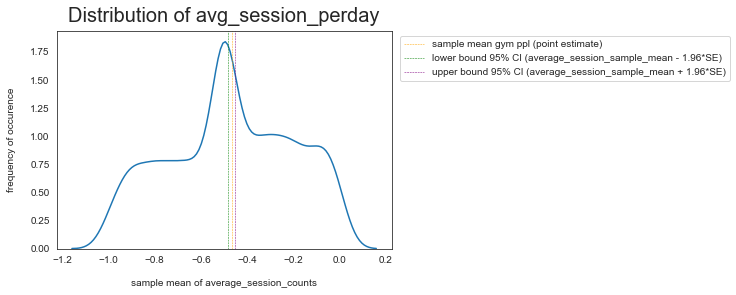

In [106]:
sns.distplot(negative['change_rate'], hist=False)
plt.title("Distribution of avg_session_perday", y=1.015, fontsize=20)
plt.axvline(x=sample_mean, linestyle='--', linewidth=0.5, label="sample mean gym ppl (point estimate)", c='orange')
plt.axvline(x=lower_bound_95_perc, linestyle='--', linewidth=0.5, label="lower bound 95% CI (average_session_sample_mean - 1.96*SE)", c='g')
plt.axvline(x=upper_bound_95_perc, linestyle='--', linewidth=0.5, label="upper bound 95% CI (average_session_sample_mean + 1.96*SE)", c='purple')
plt.xlabel("sample mean of average_session_counts", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

## If it not normal distribution, it is still okay, we still can use that 10% standards as an criteria 

Let's back to the stats description table, we always focus on 3 indicators, mean , 25% (which means 25% of the data are less than that num)

remember that the total number of negative is  4505.

In [86]:
NUM=change_rate[change_rate['change_rate']<-0.7].agg('sum')
NUM

change_rate   -373.657246
count          995.000000
dtype: float64

In [198]:
NUM=change_rate[change_rate['change_rate']<-0.9].agg('sum')
NUM

change_rate   -160.353792
count          265.000000
dtype: float64

In [199]:
negative=negative.sort_values(by='change_rate')
negative.iloc[:450] ## 👍🏻 change it into the count of the 10% outlier

,oldvalue,newvalue,change_rate
4178,374304.0,3.74,-0.999990
10865,53500.0,1.00,-0.999981
27384,15000.0,1.00,-0.999933
50140,7129.0,1.00,-0.999860
20505,6500.0,1.00,-0.999846
...,...,...,...
3613,76284.0,10284.00,-0.865188
43156,2500.0,337.34,-0.865064
47599,5000.0,680.00,-0.864000
33335,11000.0,1500.00,-0.863636


In [200]:
NUM=change_rate[change_rate['change_rate']<-0.86].agg('sum')
NUM

change_rate   -204.401622
count          451.000000
dtype: float64

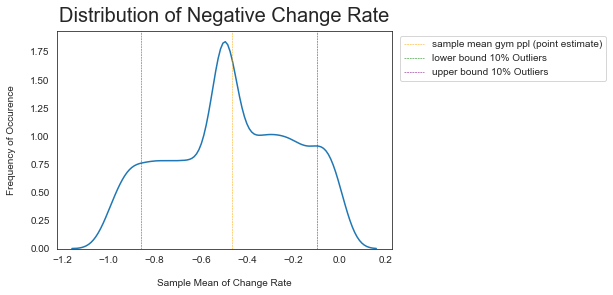

In [201]:
sns.distplot(negative['change_rate'], hist=False)
plt.title("Distribution of Negative Change Rate", y=1.015, fontsize=20)
plt.axvline(x=sample_mean, linestyle='--', linewidth=0.5, label="sample mean gym ppl (point estimate)", c='orange')
plt.axvline(x=-0.86, linestyle='--', linewidth=0.5, label="lower bound 10% Outliers", c='g')## 👍🏻 change x into the 10% outlier
plt.axvline(x=-0.1, linestyle='--', linewidth=0.5, label="upper bound 10% Outliers", c='purple')
plt.xlabel("Sample Mean of Change Rate", labelpad=14)
plt.ylabel("Frequency of Occurence", labelpad=14)

plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

## Positive Data

In [202]:
positive=value1.loc[value1['change_rate']>0]
positive.shape

(6179, 4)

In [203]:
positive=positive.sort_values(by=['change_rate'],ascending=False)

In [204]:
positive

,opportunityid,oldvalue,newvalue,change_rate
22496,0060z000022sAn0AAE,0.08,2600.08,3.250000e+04
40833,0060z000020e1BNAAY,1.00,30000.00,2.999900e+04
29997,0063800000kqxbxAAA,1.00,10800.00,1.079900e+04
52504,0060z000022A4hWAAS,1.00,10000.00,9.999000e+03
20881,0060z00002293tYAAQ,1.00,4000.00,3.999000e+03
...,...,...,...,...
10696,0060z00001wn3luAAA,4870.00,4870.13,2.669405e-05
7811,0060z00001wnWAwAAM,60000.00,60001.00,1.666667e-05
51727,0060z00001zcLobAAE,1525394.64,1525395.00,2.360045e-07
32143,0060z00001zcLobAAE,1525394.64,1525395.00,2.360045e-07


In [205]:
positive.describe()## to look at the stats description of the positive change rate 

,oldvalue,newvalue,change_rate
count,6.179000e+03,6.179000e+03,6.179000e+03
mean,2.719588e+04,5.690780e+04,2.344203e+01
std,4.070993e+05,7.553093e+05,6.018899e+02
min,1.000000e-02,8.000000e-02,2.360045e-07
25%,3.500000e+02,9.191600e+02,3.155034e-01
50%,1.001000e+03,3.000000e+03,1.000000e+00
75%,5.000000e+03,1.100000e+04,2.000000e+00
max,1.600000e+07,3.200000e+07,3.250000e+04


In [206]:
change_rate_pos=positive.groupby(['change_rate'])['change_rate'].agg('count').to_frame().rename(columns={'change_rate':'count'})
change_rate_pos=change_rate_pos.reset_index()

In [207]:
change_rate_pos ## the count for each change Rate

,change_rate,count
0,2.360045e-07,3
1,1.666667e-05,1
2,2.669405e-05,9
3,2.679098e-05,1
4,3.128072e-05,6
...,...,...
2278,3.999000e+03,1
2279,9.999000e+03,1
2280,1.079900e+04,1
2281,2.999900e+04,1


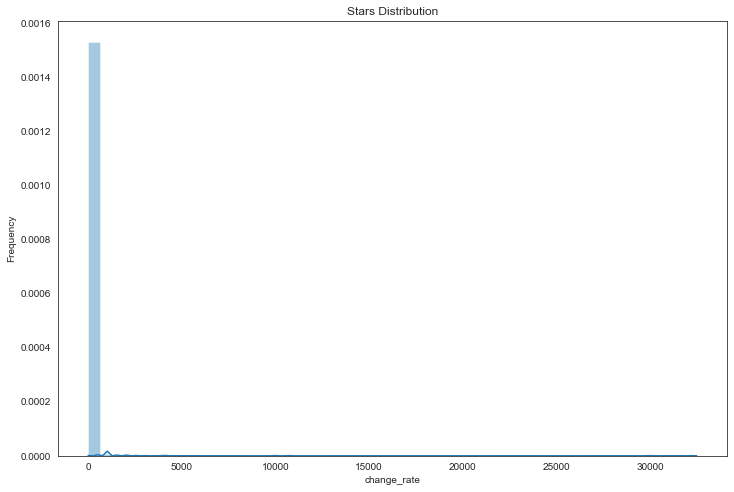

In [125]:
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.distplot(positive['change_rate'])
plt.xlabel('change_rate')
plt.ylabel('Frequency')
plt.title('Stars Distribution')
plt.show()

Same thing, we can look at 75% (how many data are greater than this number) , mean

total is 6179

In [139]:
positive.loc[positive['change_rate']>2].shape  ##how many data are > 75%=2 

(1543, 3)

### Test with 10% outlier 

In [130]:
len(positive['change_rate'])*0.1

617.9000000000001

In [138]:
positive=positive.sort_values(by='change_rate',ascending=False)
positive.iloc[:617]

,oldvalue,newvalue,change_rate
22496,0.08,2600.08,32500.000000
40833,1.00,30000.00,29999.000000
29997,1.00,10800.00,10799.000000
52504,1.00,10000.00,9999.000000
20881,1.00,4000.00,3999.000000
...,...,...,...
16747,70.00,600.00,7.571429
5173,35.00,300.00,7.571429
26158,1000.00,8512.31,7.512310
38716,1000.00,8511.00,7.511000


Test with mean, but i can't use mean here coz it is influenced a lot by the change rate and 2% is way too small

In [208]:
positive.loc[positive['change_rate']>23].shape

(182, 4)

In [209]:
182/6179

0.029454604304903705

## Test it with the outlier 5% 

In [143]:
len(positive['change_rate'])*0.05

308.95000000000005

In [144]:
positive.iloc[:308]

,oldvalue,newvalue,change_rate
22496,0.08,2600.08,32500.00
40833,1.00,30000.00,29999.00
29997,1.00,10800.00,10799.00
52504,1.00,10000.00,9999.00
20881,1.00,4000.00,3999.00
...,...,...,...
52696,1000.00,13000.00,12.00
29500,5000.00,65000.00,12.00
43414,500.00,6500.00,12.00
7008,100.00,1300.00,12.00


In this case, the 12 is between the mean and 10% outlier standrads, so it works the best in here. Overall we cares the value decresing more than increasing

# Conclusion 

1. for negative data , try to conduct normal test, if it works for your data, then use mean-2*std. If it's not, then use the 10% as the outlier.
2. for positive data, try to use mean as the thredhood, if the percent >=5%  , then use this as standard. If it is not, then use the 5% as the outlier.

# Methods 2. Anomaly Detection 

In [158]:
change_rate3=value[['opportunityid','change_rate']]
change_rate3

,opportunityid,change_rate
3,0063800000kpTKgAAM,-0.333333
4,0063800000kqTVOAA2,-0.500000
5,0063800000oWSYwAAO,7.400000
15,0063800000mNSg9AAG,9.000000
24,0060z00001wmZQwAAM,1.857143
...,...,...
59331,0060z000022AubfAAC,-0.250000
59340,0060z000022v6ZSAAY,1.000000
59343,0060z0000228YCRAA2,-0.545455
59346,0060z000022thFWAAY,4.000000


In [160]:
change_rate_3=change_rate3.set_index(['opportunityid'])

In [161]:
change_rate_3

,change_rate
opportunityid,
0063800000kpTKgAAM,-0.333333
0063800000kqTVOAA2,-0.500000
0063800000oWSYwAAO,7.400000
0063800000mNSg9AAG,9.000000
0060z00001wmZQwAAM,1.857143
...,...
0060z000022AubfAAC,-0.250000
0060z000022v6ZSAAY,1.000000
0060z0000228YCRAA2,-0.545455


In [162]:
value=change_rate_3.index

In [163]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(change_rate_3[['change_rate']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

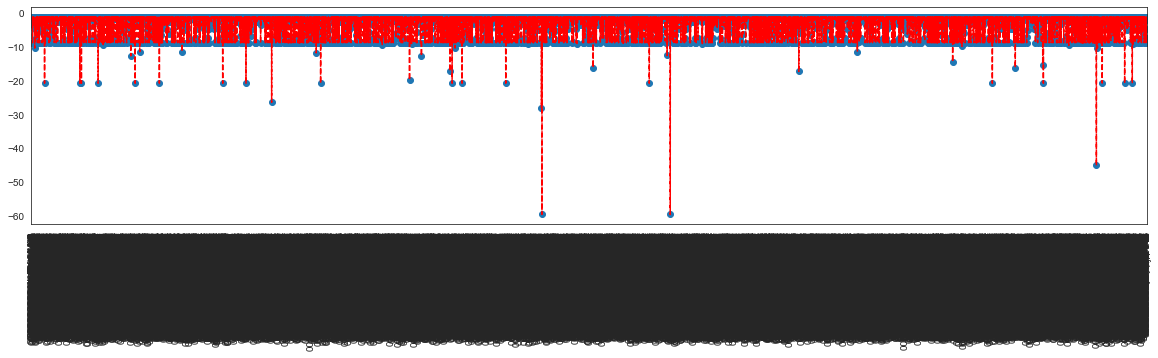

opportunityid
0060z00001yAZOAAA4   -59.475510
0060z00001zZ5FWAA0   -59.423307
0060z00001wpUnHAAU   -44.973011
0060z000020df9KAAQ   -27.846410
0063800000mPHQkAAO   -26.282634
dtype: float64
0    9789
4     889
3       2
2       2
1       2
dtype: int64


In [164]:
import matplotlib.pylab as plt
X=change_rate_3[['change_rate']]
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
plt.xlim(-10,1000)
plt.xticks(range(len(X)),value,rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.show()
print(pd.Series(GM.score_samples(X),index=value).sort_values().head())


# also check for tiny clusters
print (pd.Series(GM.predict(X)).value_counts())

In [167]:
change_rate_3['predicted']=GM.predict(X)

In [186]:
data=change_rate_3.sample(10684)
data

,change_rate,predicted
opportunityid,,
0060z000020zY57AAE,1.000000,0
0060z000022rjr5AAA,0.250000,0
0060z00001xse59AAA,5.900000,4
0060z00001ynN7PAAU,1.333333,0
0060z000021NliPAAS,0.200000,0
...,...,...
0060z00001zZt2KAAS,0.116981,0
0060z000023WlvEAAS,0.400000,0
0060z00001wmrUsAAI,1.000000,0


In [188]:
data2=data.loc[data['predicted'] != 0]
data2

,change_rate,predicted
opportunityid,,
0060z00001xse59AAA,5.900000,4
0060z00001xtcvVAAQ,17.000000,4
0060z000022rKaIAAU,9.000000,4
0063800000claH5AAI,132.333333,4
0060z0000227QPZAA2,9.000000,4
...,...,...
0060z000023WrYJAA0,300.000000,4
0060z00001vTG6iAAG,9.000000,4
0060z000020y8e1AAA,9.000000,4
